In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.spatial.distance import cdist
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier


#To get better visual of the confusion matrix:
def plot_confusion_matrix(cm, classes,
             normalize=False,
             title='Confusion matrix',
             cmap=plt.cm.Blues):
    #Add Normalization Option
    '''prints pretty confusion metric with normalization option '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix\\\\")
    #else:
        #print('Confusion matrix, without normalization\\\\')
    
#     print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

use_pca = True

#carichiamo i dati 
df = pd.read_csv("exoplanet.csv")
df.info()
df = df.replace('CONFIRMED', 0)
df = df.replace('CANDIDATE', 1)
df = df.replace('FALSE POSITIVE', 2)
df = df.fillna(0)

df.to_csv("Exoplanet_mod.csv")
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,0,1,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,0,1,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,0,2,2,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,0,2,2,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,0,1,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9559,9560,10031643,K07984.01,0,2,2,0.000,0,0,0,...,-152.0,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
9560,9561,10090151,K07985.01,0,2,2,0.000,0,1,1,...,-166.0,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
9561,9562,10128825,K07986.01,0,1,1,0.497,0,0,0,...,-220.0,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
9562,9563,10147276,K07987.01,0,2,2,0.021,0,0,1,...,-236.0,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [2]:
#normalize feature with MinMaxScaler after it we need to fit the data
MinMaxScaler = preprocessing.MinMaxScaler()

y_data = pd.read_csv('Exoplanet_mod.csv', usecols= ['koi_disposition'])
x_data = pd.read_csv('Exoplanet_mod.csv', usecols= ['koi_fpflag_nt','koi_fpflag_ss','koi_fpflag_co','koi_fpflag_ec','koi_period','koi_period_err1','koi_period_err2','koi_time0bk','koi_time0bk_err1','koi_time0bk_err2','koi_impact','koi_impact_err1','koi_impact_err2','koi_duration','koi_duration_err1','koi_duration_err2','koi_depth','koi_depth_err1','koi_depth_err2','koi_prad','koi_prad_err1','koi_prad_err2','koi_teq','koi_teq_err1','koi_teq_err2','koi_insol','koi_insol_err1','koi_insol_err2','koi_model_snr','koi_tce_plnt_num','koi_steff','koi_steff_err1','koi_steff_err2','koi_slogg','koi_slogg_err1','koi_slogg_err2','koi_srad','koi_srad_err1','koi_srad_err2','ra','dec','koi_kepmag'])

#take the 80% of data for train and 20% for test
x_train = x_data[:7650]
y_train = y_data[:7650]

x_test = x_data[7650:]
y_test = y_data[7650:]

x_train = x_train.values
x_test = x_test.values

print("Classes train : ", y_train.shape)
print("Features train : ", x_train.shape)

print("Classes test :", y_test.shape)
print("Features train : ", x_test.shape)

x_train = MinMaxScaler.fit_transform(x_train)
x_test = MinMaxScaler.fit_transform(x_test)


Classes train :  (7650, 1)
Features train :  (7650, 42)
Classes test : (1914, 1)
Features train :  (1914, 42)


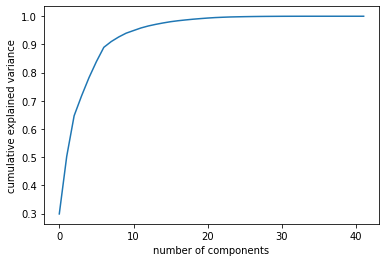

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca_train = PCA().fit(x_train)
pca_test = PCA().fit(x_test)

cum_var = np.cumsum(pca_train.explained_variance_ratio_)

plt.plot(cum_var)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

XTrain = pca_train.transform(x_train)
XTest = pca_test.transform(x_test) 

In [4]:
#CALCOLO LDA CON SKLEARN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
XTrain = lda.transform(x_train)
XTest = lda.transform(x_test)

d:\program file\python\lib\site-packages\sklearn\utils\validation.py:1107: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


################# euclidean [K=7]  #################
              precision    recall  f1-score   support

           0       0.12      0.50      0.19        38
           1       0.95      0.64      0.76       443
           2       0.98      1.00      0.99      1433

    accuracy                           0.91      1914
   macro avg       0.68      0.71      0.65      1914
weighted avg       0.96      0.91      0.92      1914

Euclidean\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


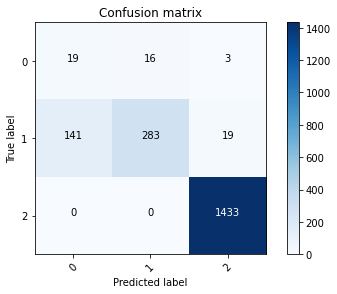

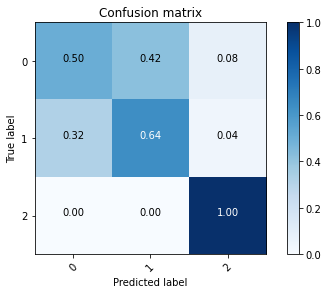

################# euclidean [K=9]  #################
              precision    recall  f1-score   support

           0       0.11      0.47      0.18        38
           1       0.94      0.63      0.76       443
           2       0.98      1.00      0.99      1433

    accuracy                           0.90      1914
   macro avg       0.68      0.70      0.64      1914
weighted avg       0.96      0.90      0.92      1914

Euclidean\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


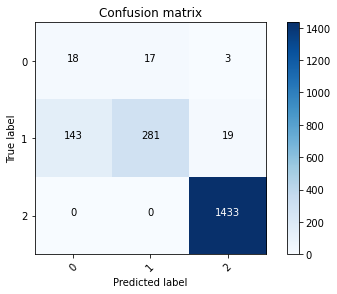

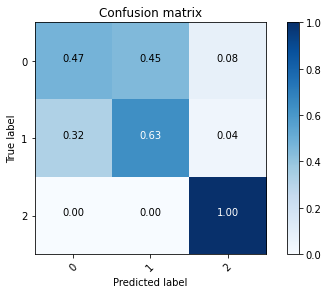

################# euclidean [K=11]  #################
              precision    recall  f1-score   support

           0       0.11      0.47      0.18        38
           1       0.94      0.63      0.75       443
           2       0.99      1.00      0.99      1433

    accuracy                           0.90      1914
   macro avg       0.68      0.70      0.64      1914
weighted avg       0.96      0.90      0.92      1914

Euclidean\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


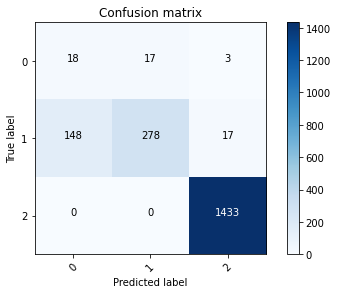

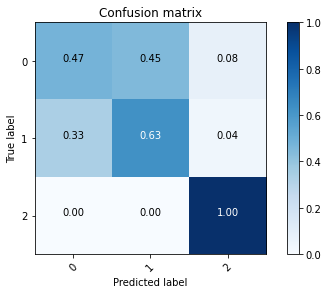

################# euclidean [K=13]  #################
              precision    recall  f1-score   support

           0       0.12      0.53      0.19        38
           1       0.95      0.62      0.75       443
           2       0.98      1.00      0.99      1433

    accuracy                           0.90      1914
   macro avg       0.68      0.71      0.64      1914
weighted avg       0.96      0.90      0.92      1914

Euclidean\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


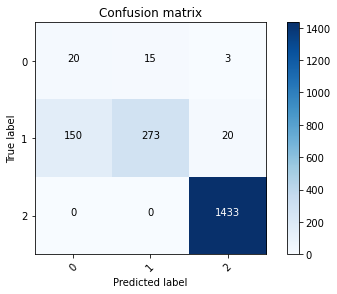

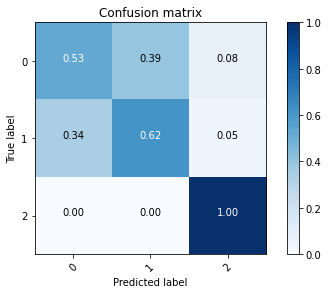

################# euclidean [K=15]  #################
              precision    recall  f1-score   support

           0       0.10      0.45      0.17        38
           1       0.94      0.63      0.75       443
           2       0.98      1.00      0.99      1433

    accuracy                           0.90      1914
   macro avg       0.68      0.69      0.64      1914
weighted avg       0.96      0.90      0.92      1914

Euclidean\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


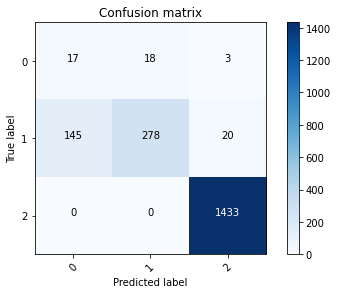

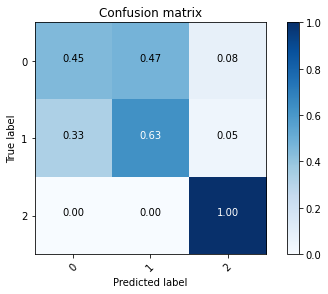

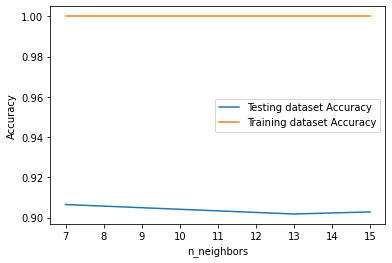

################# manhattan [K=7]  #################
              precision    recall  f1-score   support

           0       0.13      0.45      0.20        38
           1       0.94      0.71      0.81       443
           2       0.99      1.00      0.99      1433

    accuracy                           0.92      1914
   macro avg       0.69      0.72      0.67      1914
weighted avg       0.96      0.92      0.93      1914

Manhattan\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


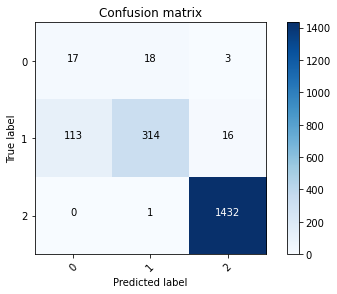

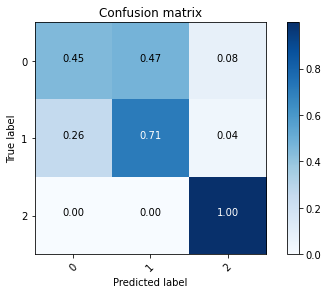

################# manhattan [K=9]  #################
              precision    recall  f1-score   support

           0       0.16      0.53      0.24        38
           1       0.95      0.72      0.82       443
           2       0.99      1.00      0.99      1433

    accuracy                           0.93      1914
   macro avg       0.70      0.75      0.68      1914
weighted avg       0.96      0.93      0.94      1914

Manhattan\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


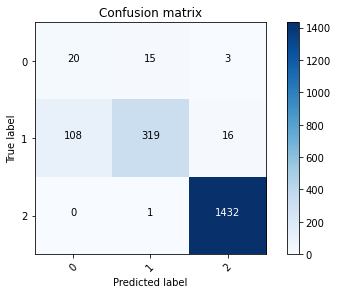

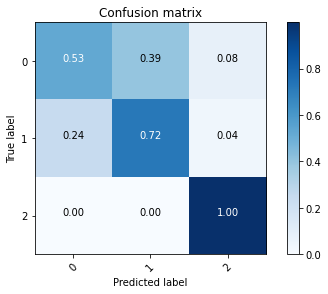

################# manhattan [K=11]  #################
              precision    recall  f1-score   support

           0       0.15      0.53      0.23        38
           1       0.95      0.70      0.81       443
           2       0.99      1.00      0.99      1433

    accuracy                           0.92      1914
   macro avg       0.70      0.74      0.68      1914
weighted avg       0.96      0.92      0.94      1914

Manhattan\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


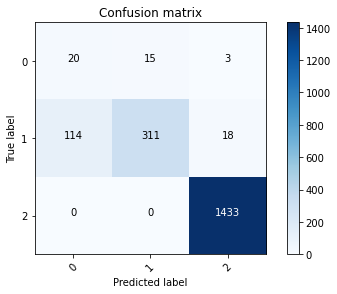

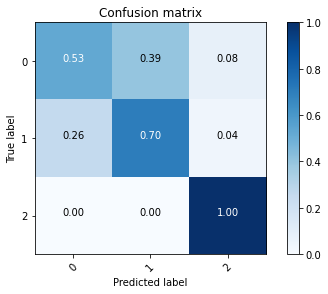

################# manhattan [K=13]  #################
              precision    recall  f1-score   support

           0       0.15      0.50      0.22        38
           1       0.95      0.71      0.82       443
           2       0.99      1.00      0.99      1433

    accuracy                           0.92      1914
   macro avg       0.69      0.74      0.68      1914
weighted avg       0.96      0.92      0.94      1914

Manhattan\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


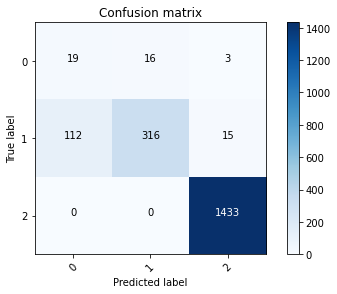

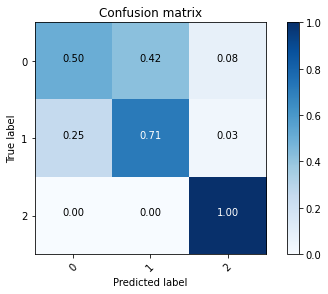

################# manhattan [K=15]  #################
              precision    recall  f1-score   support

           0       0.14      0.47      0.22        38
           1       0.95      0.71      0.81       443
           2       0.99      1.00      0.99      1433

    accuracy                           0.92      1914
   macro avg       0.69      0.73      0.67      1914
weighted avg       0.96      0.92      0.94      1914

Manhattan\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


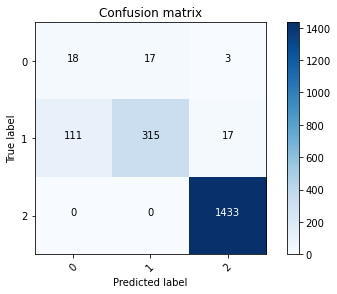

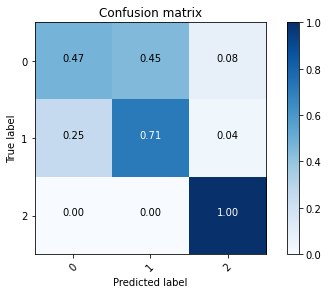

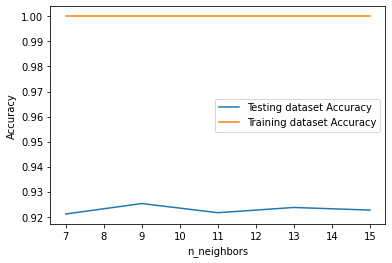

################# chebyshev [K=7]  #################
              precision    recall  f1-score   support

           0       0.12      0.55      0.20        38
           1       0.95      0.61      0.74       443
           2       0.99      1.00      0.99      1433

    accuracy                           0.90      1914
   macro avg       0.69      0.72      0.64      1914
weighted avg       0.96      0.90      0.92      1914

Chebyshev\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


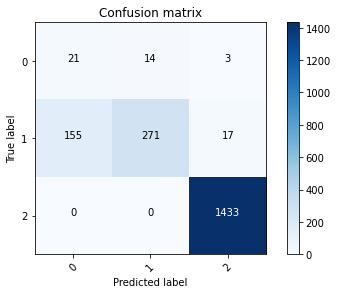

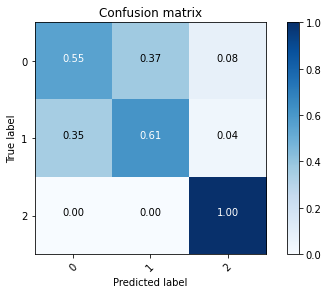

################# chebyshev [K=9]  #################
              precision    recall  f1-score   support

           0       0.11      0.55      0.19        38
           1       0.95      0.59      0.73       443
           2       0.99      1.00      0.99      1433

    accuracy                           0.90      1914
   macro avg       0.68      0.71      0.64      1914
weighted avg       0.96      0.90      0.92      1914

Chebyshev\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


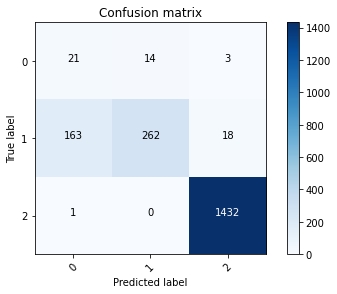

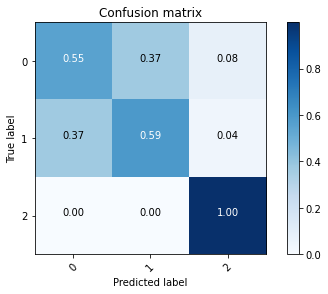

################# chebyshev [K=11]  #################
              precision    recall  f1-score   support

           0       0.11      0.53      0.19        38
           1       0.95      0.60      0.74       443
           2       0.99      1.00      0.99      1433

    accuracy                           0.90      1914
   macro avg       0.68      0.71      0.64      1914
weighted avg       0.96      0.90      0.92      1914

Chebyshev\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


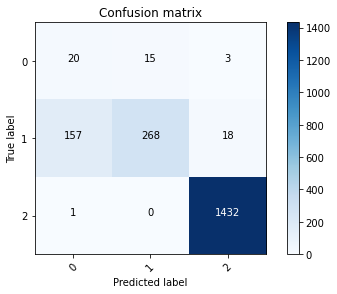

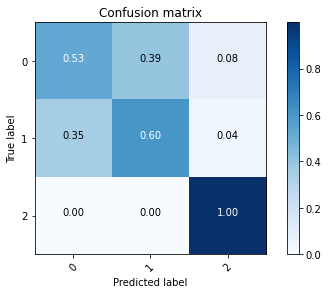

################# chebyshev [K=13]  #################
              precision    recall  f1-score   support

           0       0.12      0.55      0.19        38
           1       0.95      0.60      0.73       443
           2       0.98      1.00      0.99      1433

    accuracy                           0.90      1914
   macro avg       0.68      0.72      0.64      1914
weighted avg       0.96      0.90      0.92      1914

Chebyshev\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


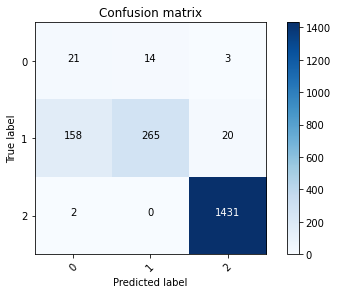

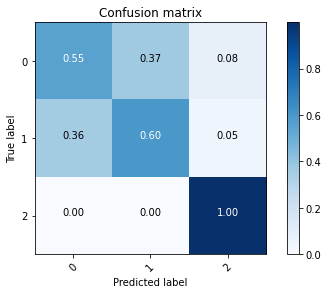

################# chebyshev [K=15]  #################
              precision    recall  f1-score   support

           0       0.11      0.50      0.18        38
           1       0.94      0.62      0.75       443
           2       0.98      1.00      0.99      1433

    accuracy                           0.90      1914
   macro avg       0.68      0.71      0.64      1914
weighted avg       0.96      0.90      0.92      1914

Chebyshev\\


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


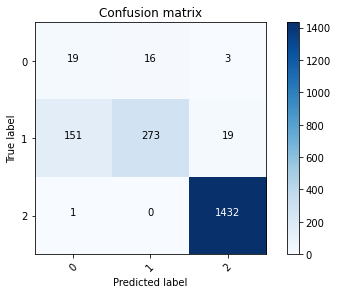

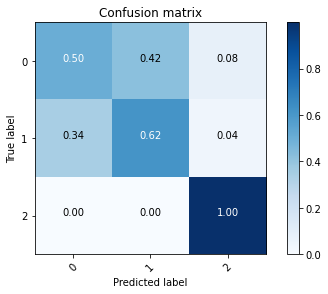

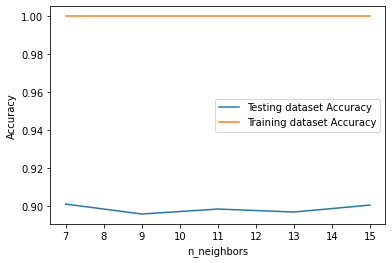

################# minkowski [K=7]  #################


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.11      0.50      0.18        38
           1       0.95      0.63      0.75       443
           2       0.99      1.00      0.99      1433

    accuracy                           0.90      1914
   macro avg       0.68      0.71      0.64      1914
weighted avg       0.96      0.90      0.92      1914

Minkowski\\


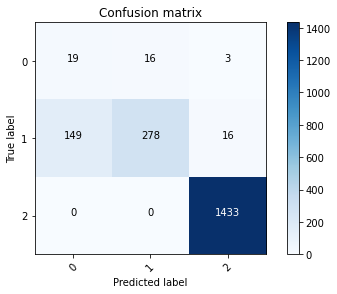

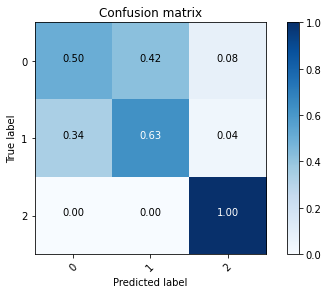

################# minkowski [K=9]  #################


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.10      0.45      0.16        38
           1       0.94      0.60      0.73       443
           2       0.98      1.00      0.99      1433

    accuracy                           0.90      1914
   macro avg       0.67      0.68      0.63      1914
weighted avg       0.96      0.90      0.92      1914

Minkowski\\


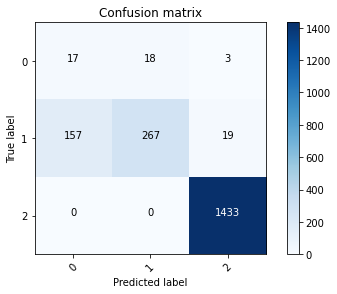

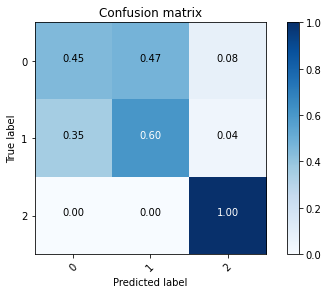

################# minkowski [K=11]  #################


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.11      0.50      0.17        38
           1       0.94      0.60      0.73       443
           2       0.99      1.00      0.99      1433

    accuracy                           0.90      1914
   macro avg       0.68      0.70      0.63      1914
weighted avg       0.96      0.90      0.92      1914

Minkowski\\


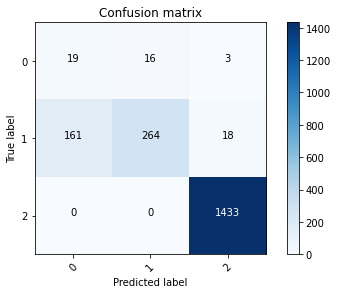

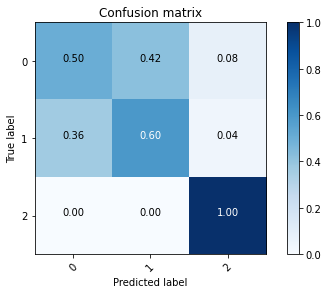

################# minkowski [K=13]  #################


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.10      0.47      0.17        38
           1       0.94      0.60      0.74       443
           2       0.98      1.00      0.99      1433

    accuracy                           0.90      1914
   macro avg       0.68      0.69      0.63      1914
weighted avg       0.96      0.90      0.92      1914

Minkowski\\


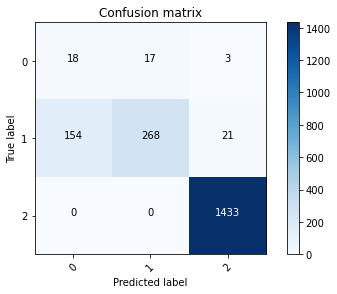

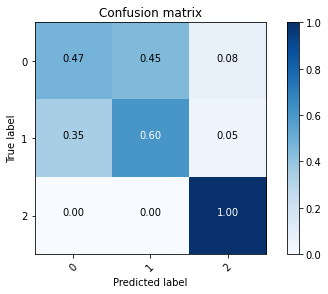

################# minkowski [K=15]  #################


d:\program file\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


              precision    recall  f1-score   support

           0       0.10      0.47      0.17        38
           1       0.94      0.60      0.73       443
           2       0.98      1.00      0.99      1433

    accuracy                           0.90      1914
   macro avg       0.68      0.69      0.63      1914
weighted avg       0.96      0.90      0.92      1914

Minkowski\\


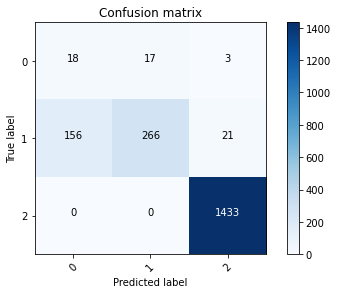

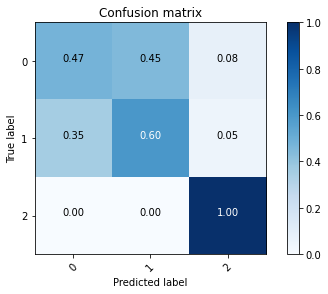

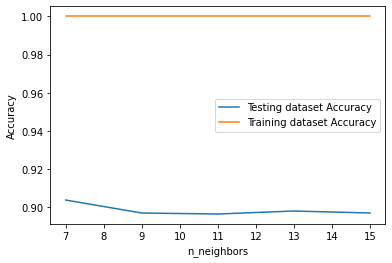

In [5]:
from sklearn.metrics import accuracy_score
ks = [7,9,11,13,15]
funs = ["euclidean", "manhattan","chebyshev","minkowski"]#,"seuclidean","mahalanobis"]

V = np.cov(x_train)
classes = ['0','1','2']

train_accuracy = np.empty(len(ks))
test_accuracy = np.empty(len(ks))
train_scores, test_scores = list(), list()

for fun in funs:
    i=0
    for k in ks:
        if fun=="minkowski":
            knn_clf=KNeighborsClassifier(n_neighbors=k, weights='distance', metric=fun, p=8)
        elif fun == "manhattan":
            knn_clf=KNeighborsClassifier(n_neighbors=k, weights='distance', metric=fun, p=1)
        else:
            knn_clf=KNeighborsClassifier(n_neighbors=k, weights='distance', metric=fun)
        
        print("#################", fun ,"[K=%i]  #################" % k)
        knn_clf.fit(x_train,y_train)
        predict=knn_clf.predict(x_test)

        classification_metrics = metrics.classification_report(y_test, np.round(predict), target_names=classes)
        cm_dict = metrics.classification_report(y_test, np.round(predict), target_names=classes, output_dict=True)
        #print("\nParameters (k,metric):",k,fun)
        print(classification_metrics)
        print(fun[0].capitalize()+fun[1:]+"\\\\")
        #print(df)

        confusion_matrix= metrics.confusion_matrix(y_test, predict)

        plot_confusion_matrix(confusion_matrix, classes)
        plt.show()
        plot_confusion_matrix(confusion_matrix, classes, normalize=True)
        plt.show()

        #test new graph to show accuracy 
        test_accuracy[i] = knn_clf.score(x_test, y_test)
        #knn_clf.fit(x_test,y_test)
        train_accuracy[i] = knn_clf.score(x_train, y_train)
        i = i+1

    plt.plot(ks, test_accuracy, label = 'Testing dataset Accuracy')
    plt.plot(ks, train_accuracy, label = 'Training dataset Accuracy')
    
    plt.legend()
    plt.xlabel('n_neighbors')
    plt.ylabel('Accuracy')
    plt.show()
